In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

In [43]:
df=pd.read_csv('weatherAUS.csv')

In [44]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


<AxesSubplot:>

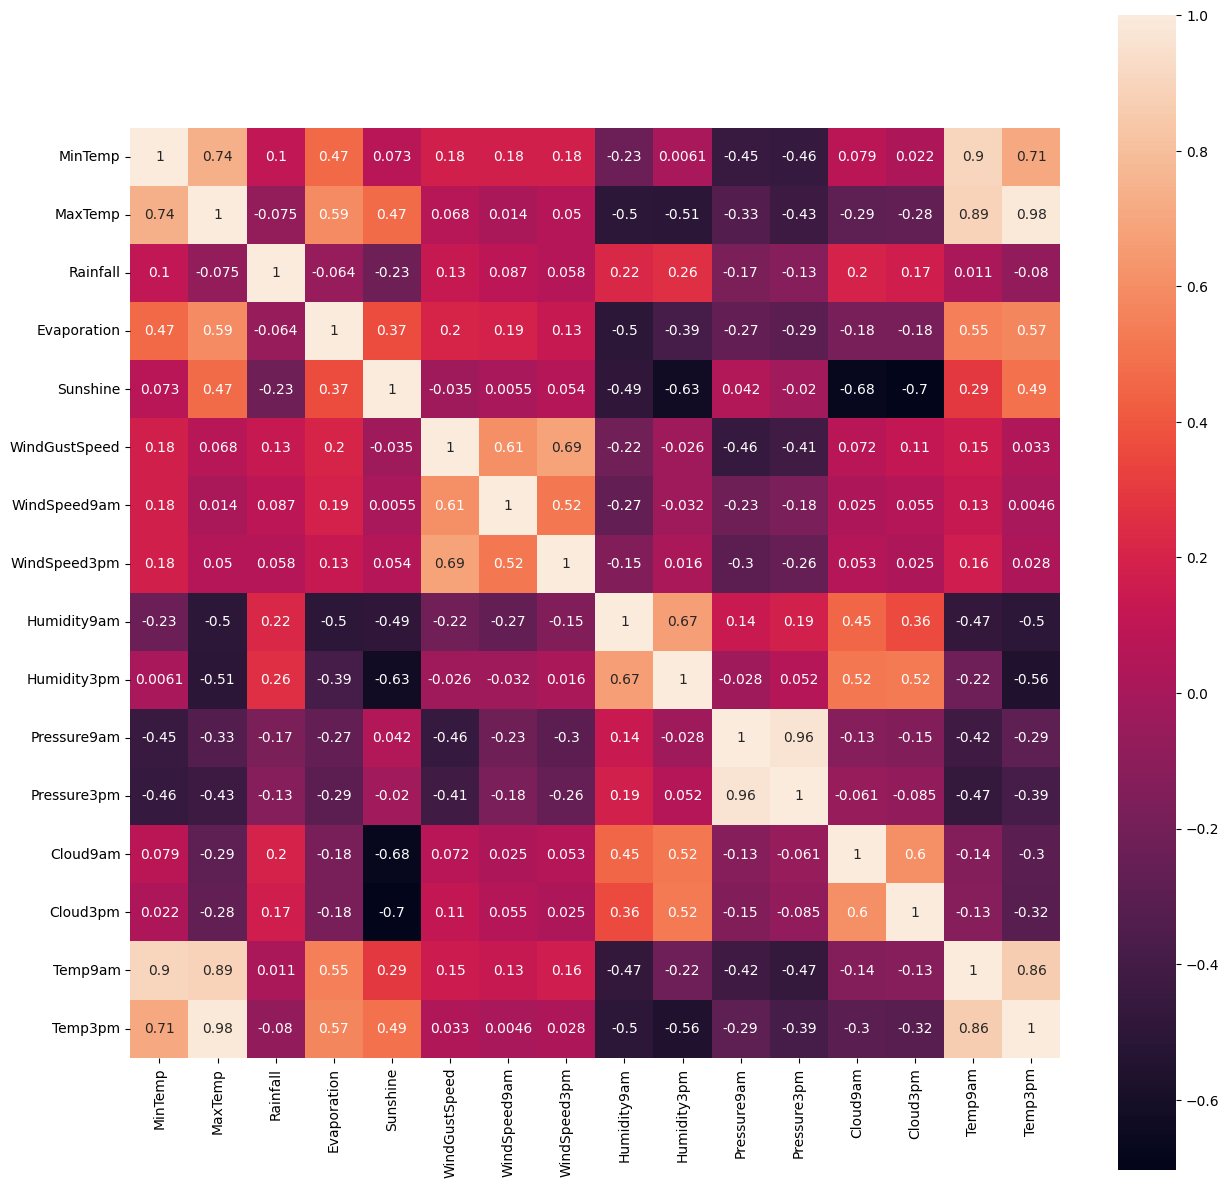

In [45]:
corrmat = df.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corrmat,annot=True, square=True)

In [46]:
df['Date']= pd.to_datetime(df["Date"])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df=df.drop('Date',axis=1)
df = df[[col for col in df.columns if col != 'RainTomorrow']+['RainTomorrow']]
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2012.769751,6.399615,15.712258
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,2.537684,3.427262,8.794789
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,2013.000000,6.000000,16.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,2017.000000,12.000000,31.000000


In [47]:
df=df.dropna()
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333,2012.221074,6.425009,15.723910
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543,2.450978,3.451383,8.782527
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,2007.000000,1.000000,1.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000,2010.000000,3.000000,8.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,2012.000000,6.000000,16.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,2014.000000,9.000000,23.000000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,2017.000000,12.000000,31.000000


In [48]:
le = LabelEncoder()
df = df.apply(le.fit_transform)
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day,RainTomorrow
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,...,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,12.628837,182.648245,173.191014,13.686086,54.424123,77.356239,7.485537,17.084810,7.122935,7.574424,...,280.980681,4.241705,4.326515,186.048281,173.102091,0.220879,5.221074,5.425009,14.723910,0.220259
std,7.301231,64.161318,69.699444,37.454426,33.948365,37.581501,4.792305,7.192146,4.660823,4.711700,...,68.598016,2.797162,2.647251,65.673638,68.351387,0.414843,2.450978,3.451383,8.782527,0.414425
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,134.000000,118.000000,0.000000,28.000000,50.000000,3.000000,12.000000,3.000000,3.000000,...,234.000000,1.000000,2.000000,135.000000,120.000000,0.000000,3.000000,2.000000,7.000000,0.000000
50%,13.000000,180.000000,170.000000,0.000000,50.000000,86.000000,8.000000,16.000000,7.000000,8.000000,...,280.000000,5.000000,5.000000,182.000000,170.000000,0.000000,5.000000,5.000000,15.000000,0.000000
75%,19.000000,232.000000,228.000000,6.000000,74.000000,107.000000,12.000000,21.000000,11.000000,12.000000,...,327.000000,7.000000,7.000000,237.000000,225.000000,0.000000,7.000000,8.000000,22.000000,0.000000
max,25.000000,347.000000,394.000000,409.000000,258.000000,144.000000,15.000000,60.000000,15.000000,15.000000,...,506.000000,8.000000,9.000000,382.000000,392.000000,1.000000,10.000000,11.000000,30.000000,1.000000


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

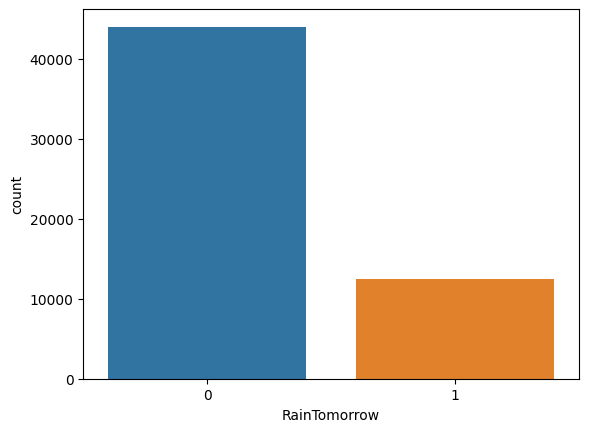

In [49]:
sns.countplot(x=df['RainTomorrow'])

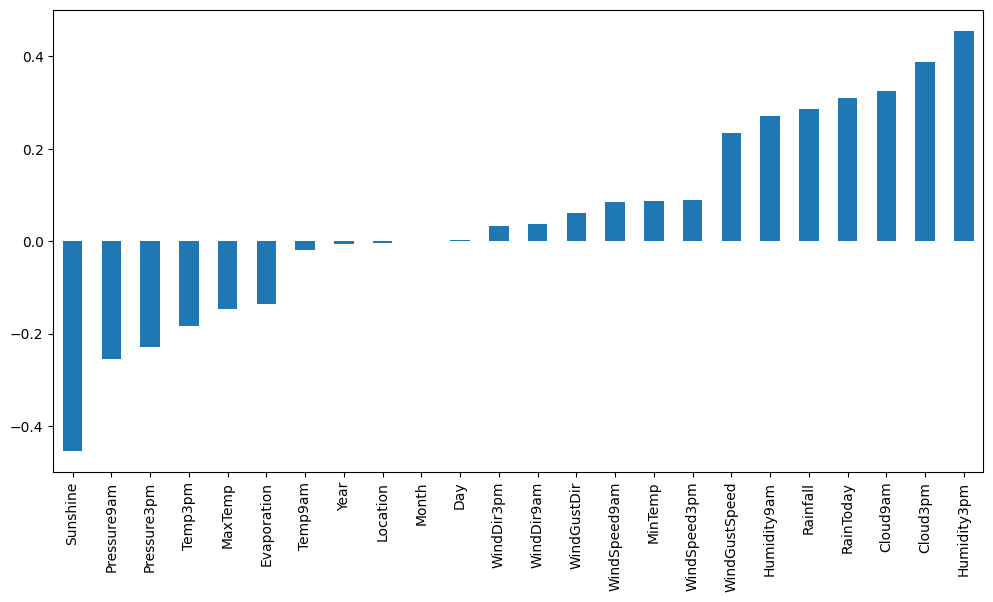

In [50]:
plt.figure(figsize=(12, 6))
df.corr()['RainTomorrow'].sort_values()[:-1].plot(kind='bar')
plt.show()

In [51]:
df=df.drop(['Year',  'Month', 'Day','Location', 'Temp9am'], axis=1)

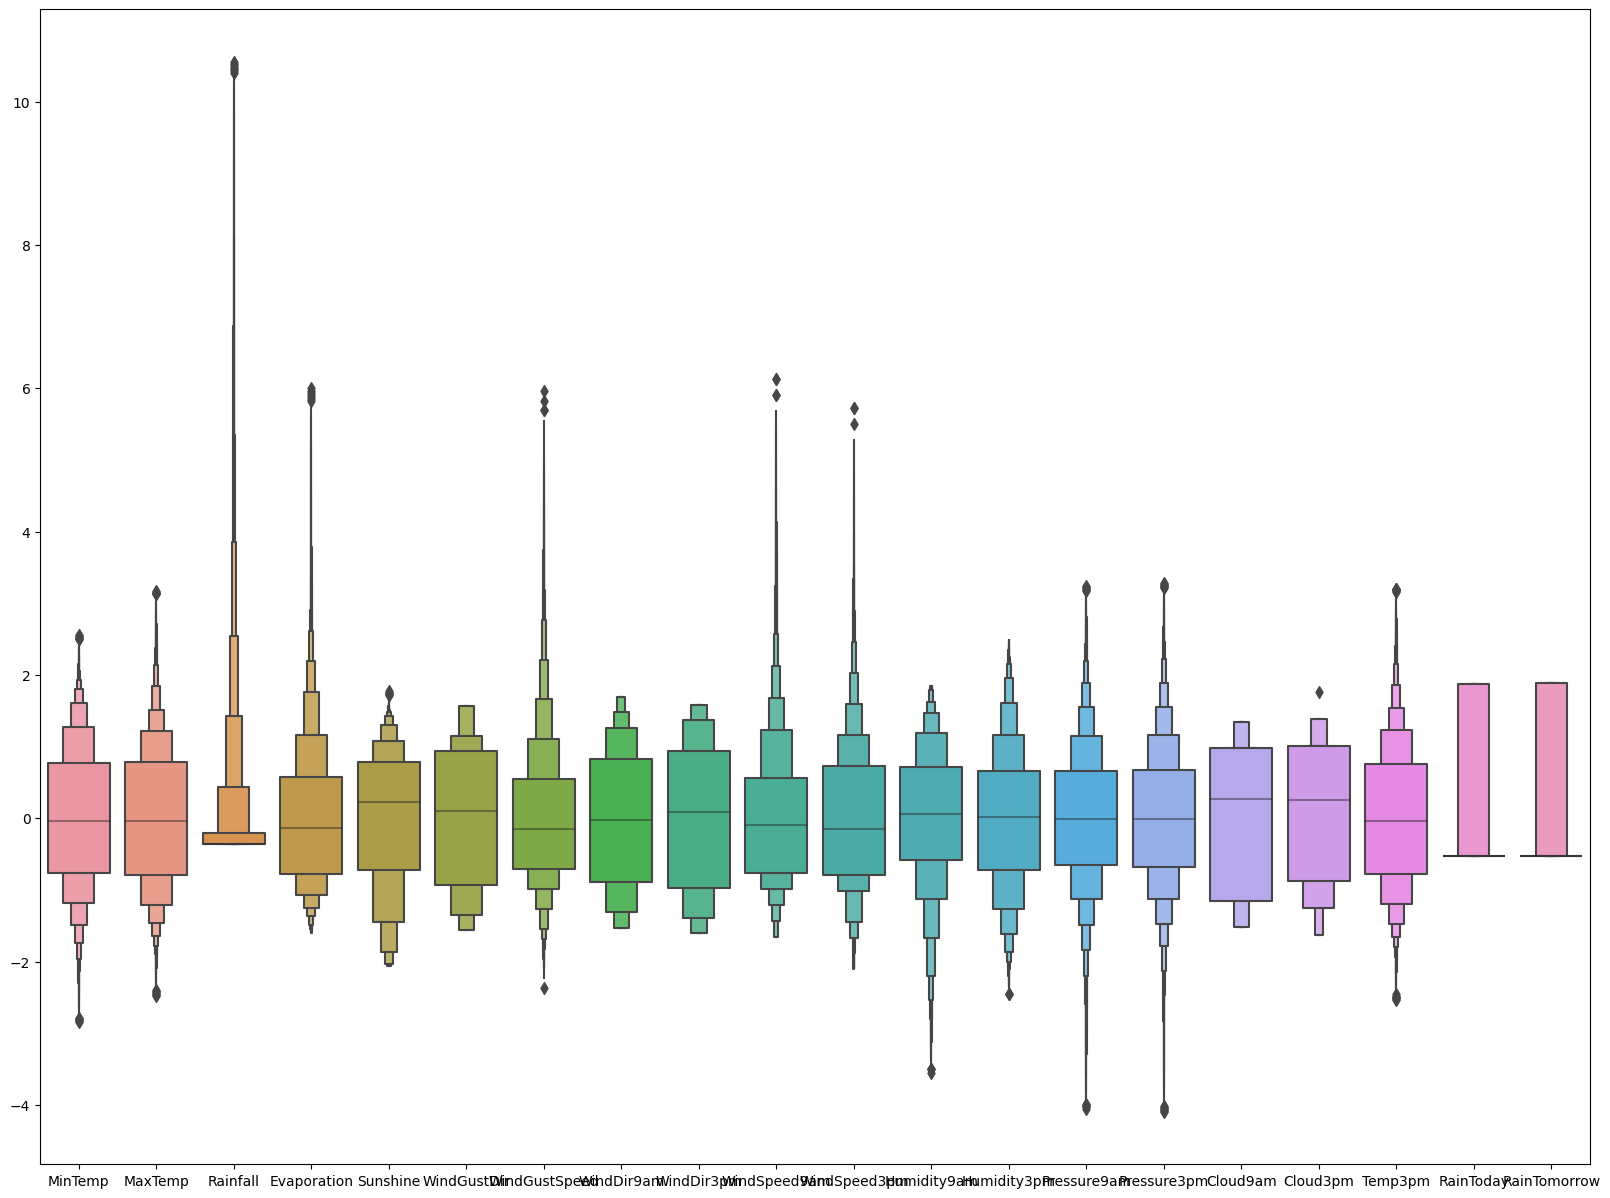

In [52]:
from sklearn.preprocessing import StandardScaler

columns=df.columns
X_feat = StandardScaler().fit_transform(df)
X_feat=pd.DataFrame(X_feat,columns=columns)
plt.figure(figsize=(20,15))
sns.boxenplot(data =X_feat)
plt.xticks(rotation=0)
plt.show()

In [53]:
from scipy import stats
df=df[(np.abs(stats.zscore(df)) < 2).all(axis=1)]

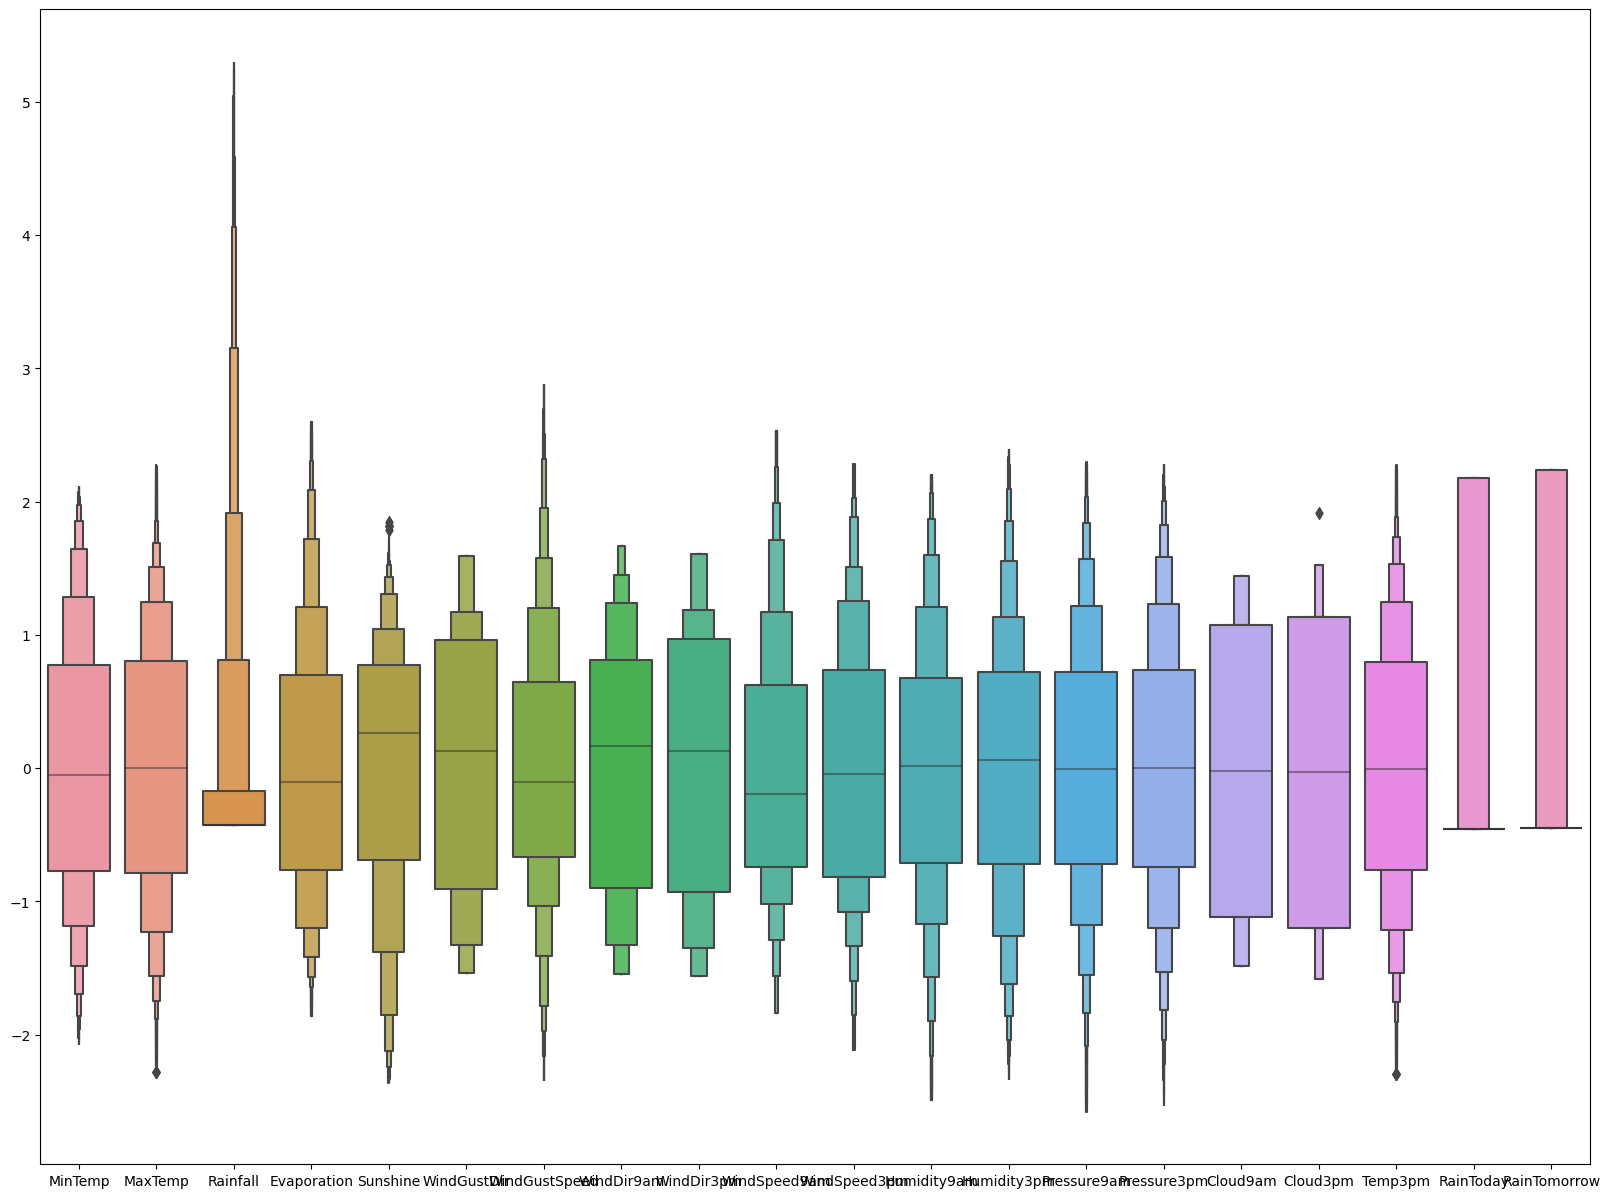

In [54]:
columns=df.columns
X_feat = StandardScaler().fit_transform(df)
X_feat = pd.DataFrame(X_feat,columns=columns)
plt.figure(figsize=(20,15))
sns.boxenplot(data =X_feat)
plt.xticks(rotation=0)
plt.show()

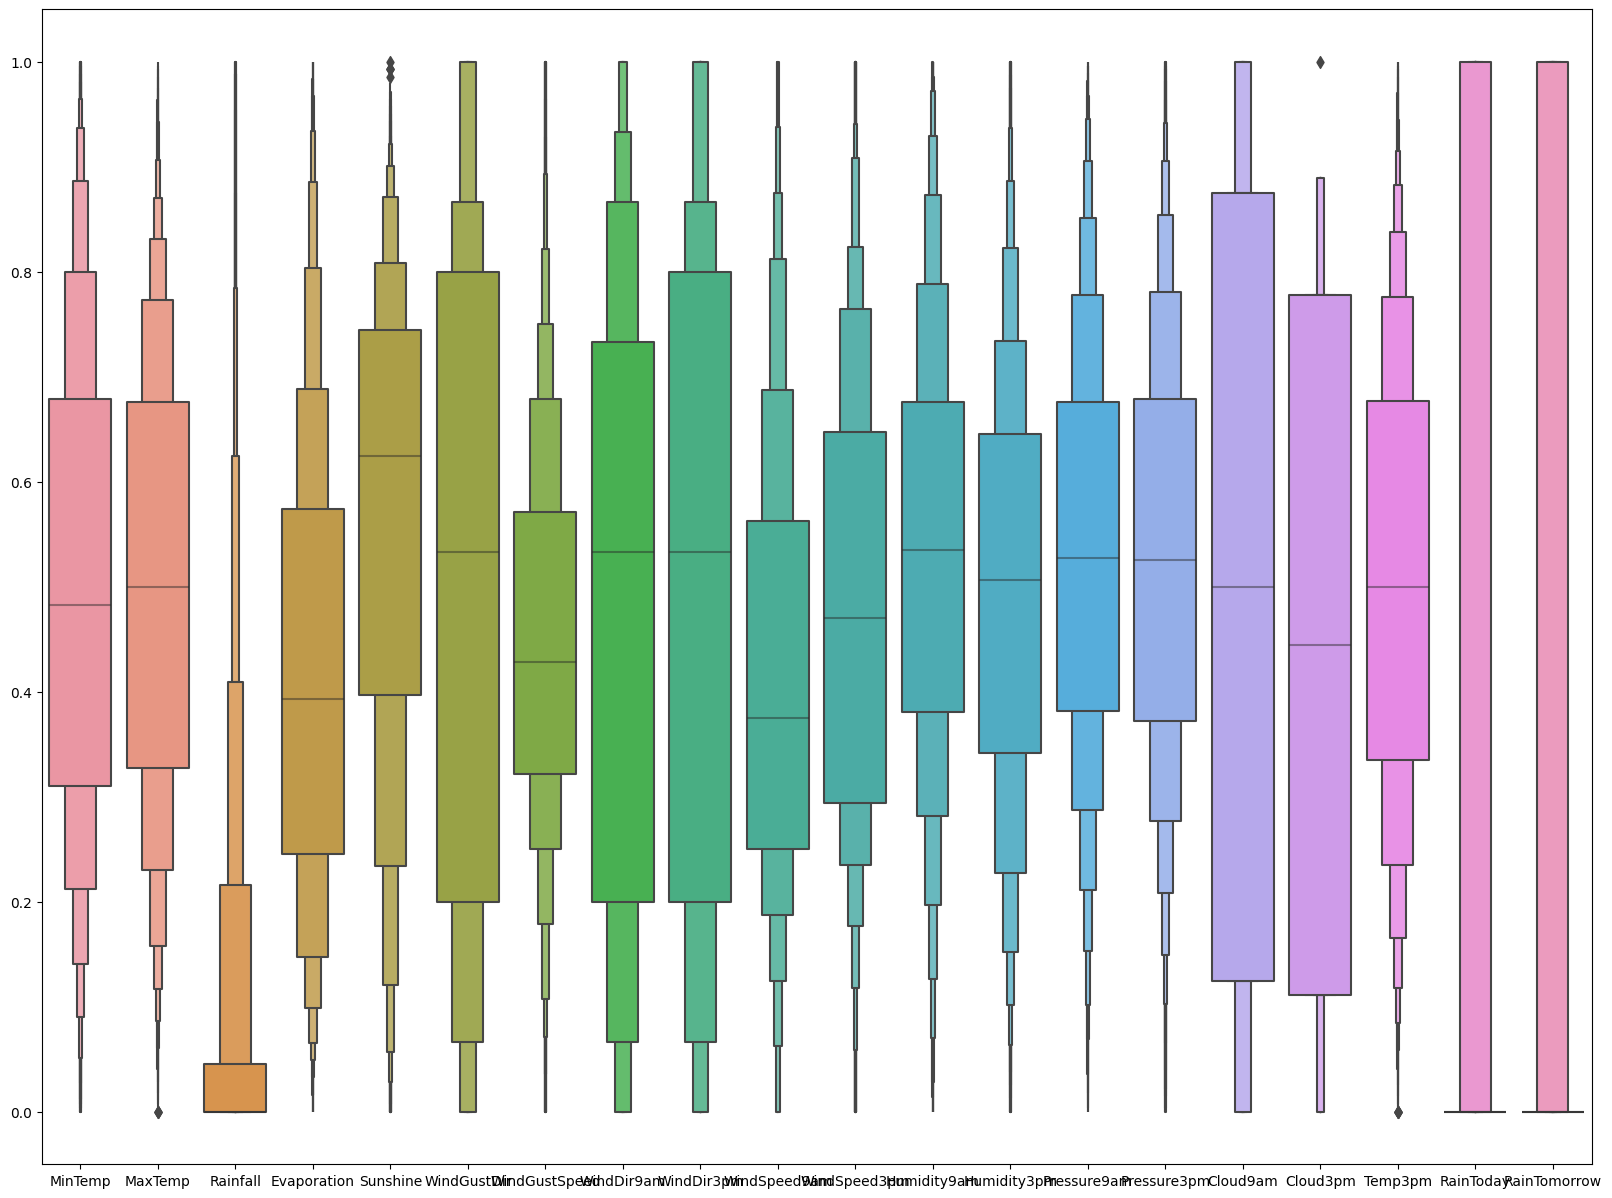

In [55]:
columns=df.columns
X_feat = MinMaxScaler().fit_transform(df)
X_feat = pd.DataFrame(X_feat,columns=columns)
plt.figure(figsize=(20,15))
sns.boxenplot(data =X_feat)
plt.xticks(rotation=0)
plt.show()